# Artificial Intelligence
kepintaran buatan, keinginan kita untuk membuat komputer yang sepintar manusia, bisa diajak ngobrol dan bisa request penyelesaian masalah/ otomasi dengan cara komunikasi manusia pada umumnya

Tapi, teknologi belum mencapai level tersebut. Ada yang mendekati, tapi belum mencapai

# Deep Learning
satu level diatas machine learning, machine learning yang lebih complex

# Machine Learning
yang akan kita pelajari hari ini, teknik membuat model (atau program) dimana tidak memerlukan code baris per baris menggunakan conditional, loop, dll pada umumnya

menggunakan:
1. teknik (algoritma) tertentu dari banyak pilihan
2. data, dalam format tertentu (numerik)

teknik + data -> dilatih => model

model adalah algoritma yang sudah dilatih dengan data

# Jenis jenis Machine Learning

## Supervised
model ML dimana kita membuat prediksi. Ada input, ada output. Input memiliki fitur dan label. Output berbentuk label.

contoh: input adalah tahun pembelian rumah, label adalah harga rumahnya. dengan memilih algoritma(teknik) tertentu dan melatih dengan data penjualan rumah 10 tahun terakhir, kita bisa membuat model machine learning yang memprediksi dari input (tahun) berapa harga rumahnya (label)

fitur: input tahun, 1 fitur, fitur bisa banyak misalnya selain tahun rumah kita kasih juga lokasi kota rumahnya

label: hasil prediksi nya, dalam kasus ini label adalah harga rumah. label cuma 1.

contoh lagi: input adalah gambar, gambar kucing, gambar pohon. output adalah label, "kucing" atau "pohon". misalkan "kucing" adalah 0 dan "pohon" adalah 1.

- Regression
- Classification

label sebuah model machine learning, selalu tipe numerik. tapi, kalau masi ingat kelas descriptive statistics tentang random variable, ada dua jenis random variable: discrete dan continuous. angka discrete yang kategorikal bulat2 seperti hasil lempar dadu, dan angka continuous yang berjalan terus tanpa pembatas yang jelas antar angka, seperti berat badan, tinggi badan, harga, waktu, dll.

untuk label tipe discrete, kita gunakan Classification.

untuk label tipe continuous, kita gunakan Regression.

## Unsupervised
model ML tidak memiliki label. Tidak untuk membuat prediksi. Biasanya digunakan untuk merapikan data.

- Clustering - mengelompokkan data
- PCA - mengurangi dimensi data

contoh clustering: kita berikan 100 kelereng dengan warna dan ukuran berbeda ke seorang anak kecil. kita minta dikelompokkan jadi 3. bagaimana cara anak kecil tersebut membuat kelompoknya? yang mirip2 dijadiin 1 kelompok. setiap kelereng memiliki label 0, 1, atau 2 untuk masing-masing kelompok.

contoh pca: menggabungkan semua fitur menjadi fitur baru. kolom data kita awalnya ada fitur tahun dan lokasi rumah --> fitur PC1. kalau kita buka2 formulanya kita bisa dapetin `PC1 = x* tahun rumah + y * lokasi rumah + c` dimana x dan y adalah sebuah angka konstan.

# Terminology

*   Algoritma --> teknik machine learning yang mau kita gunakan
*   Dataset --> data yang kita gunakan untuk melatih sebuah algoritma ML
*   Features --> bagian dari dataset yang kita gunakan sebagai input model yang sudah dilatih
*   Target / Label --> bagian dari dataset yang kita terima sebagai output model yang sudah dilatih (khusus untuk supervised ML)
*   Model --> algoritma ML yang sudah dilatih dengan data

Contoh: prediksi harga rumah

dataset:



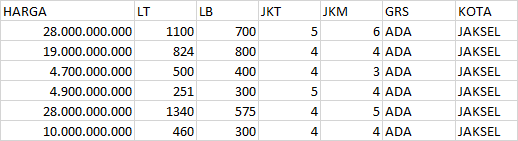

dari contoh dataset diatas, misalkan kita mau buat model ML untuk prediksi harga rumah, kita perlu pisahkan kolom "HARGA" sebagai target/label. lalu kita perlu pilih kolom fitur, data apa saja yang mau kita gunakan untuk membuat prediksinya? apakah LT dan LB saja? jadi fiturnya adalah luas tanah dan luas bangunan.

model menerima input 2 angka: luas tanah dan luas bangunan, untuk memberi output 1 angka: harga rumah.

fitur ada 2, luas tanah dan luas bangunan.

## Proses Pembuatan ML
1. siapin data, misalnya dataset dari kaggle.com
2. rapiin data, data cleaning w pandas: missing value, invalid value, dll, ubah format jadi 2 dimensi numerik semua
3. training, pilih algoritma + masukin data --> model
4. evaluasi, test seberapa akurat modelnya
5. tuning, balik balik ke step sebelum untuk mencoba membuat model yang lebih akurat

In [ ]:
# import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

```python
# cara import keseluruhan module
import sklearn.linear_model
# cara pakai LinearRegression dari module tersebut
sklearn.linear_model.LinearRegression()

# cara import 1 hal saja dari module tertentu
from sklearn.linear_model import LinearRegression
# cara pakai
LinearRegression()
```

# Regression
kita gunakan teknik regression untuk membuat model

algoritma yang kita pilih: linear regression

data yang kita pilih: data harga rumah dari kaggle [link github nya](https://github.com/stefkwan-h8/dataset/raw/main/HARGA%20RUMAH%20JAKSEL.xlsx)

In [ ]:
# 1. import contoh data yang mau kita gunakan
df_rumah = pd.read_excel("https://github.com/stefkwan-h8/dataset/raw/main/HARGA%20RUMAH%20JAKSEL.xlsx", skiprows=1)
df_rumah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   HARGA   1001 non-null   int64 
 1   LT      1001 non-null   int64 
 2   LB      1001 non-null   int64 
 3   JKT     1001 non-null   int64 
 4   JKM     1001 non-null   int64 
 5   GRS     1001 non-null   object
 6   KOTA    1001 non-null   object
dtypes: int64(5), object(2)
memory usage: 54.9+ KB


In [ ]:
df_rumah.head()

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
0,28000000000,1100,700,5,6,ADA,JAKSEL
1,19000000000,824,800,4,4,ADA,JAKSEL
2,4700000000,500,400,4,3,ADA,JAKSEL
3,4900000000,251,300,5,4,ADA,JAKSEL
4,28000000000,1340,575,4,5,ADA,JAKSEL


In [ ]:
df_rumah.tail()

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
996,16000000000,488,550,6,5,ADA,JAKSEL
997,4500000000,209,270,4,4,ADA,JAKSEL
998,29000000000,692,400,4,3,TIDAK ADA,JAKSEL
999,1700000000,102,140,4,3,TIDAK ADA,JAKSEL
1000,1250000000,63,110,3,3,TIDAK ADA,JAKSEL


<Axes: xlabel='LT', ylabel='HARGA'>

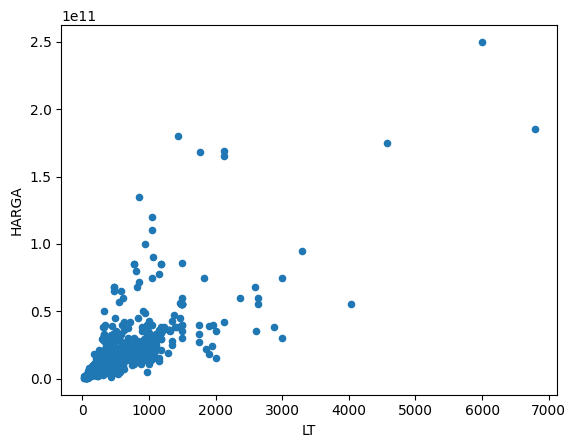

In [ ]:
# 2. persiapan data
# diatas sudah kita intip2 sedikit datanya tidak ada missing value
# harusnya kita cek invalid value
# pilih fitur dan pilih target

# fitur: LT luas tanah
# target: HARGA rumah
# aku akan buat model yang memprediksi HARGA rumah dari luas tanahnya
# bisa kita plot juga:

df_rumah.plot(kind="scatter", x="LT", y="HARGA")

In [ ]:
fitur = df_rumah[["LT"]] # harus dalam bentuk 2 dimensi
target = df_rumah["HARGA"]

display(fitur.head())
display(target[:5])

,LT
0,1100
1,824
2,500
3,251
4,1340


0    28000000000
1    19000000000
2     4700000000
3     4900000000
4    28000000000
Name: HARGA, dtype: int64

In [ ]:
# 3. pilih algoritma, latih model
model = LinearRegression()
model.fit(fitur, target)

LinearRegression()

In [ ]:
# 4. evaluasi akurasi model
model.score(fitur, target)

0.5482919679015921

untuk model tipe linear regression, ini adalah angka R2 atau angka correlation coefficient yang di kuadrat. angka ini kurang lebih menunjukkan berapa % akurasi model tipe Linear Regression. untuk tipe ML lain, teknik scoring akan berbeda.

In [ ]:
# 5. tuning
# edit2 step sebelum supaya lebih akurat

In [ ]:
# Optional: visualisasi model Linear regression nya
# model yang sudah jadi bisa kita pakai untuk memubat prediksi
# misalkan aku tanya, untuk LT dari 0 sampai 10000 harga rumah berapa?

x_luas = np.arange(0, 10000, 1000).reshape((-1,1))
display(x_luas[:5])

hasil_prediksi = model.predict(x_luas)
display(hasil_prediksi[:5])

df_prediksi_rumah = pd.DataFrame({"Luas Tanah": x_luas.reshape((10,)), "Harga Rumah (prediksi)": hasil_prediksi})
df_prediksi_rumah.head()

array([[   0],
       [1000],
       [2000],
       [3000],
       [4000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.09273295e+09, 3.10877489e+10, 6.00827649e+10, 8.90777809e+10,
       1.18072797e+11])

,Luas Tanah,Harga Rumah (prediksi)
0,0,2.092733e+09
1,1000,3.108775e+10
2,2000,6.008276e+10
3,3000,8.907778e+10
4,4000,1.180728e+11


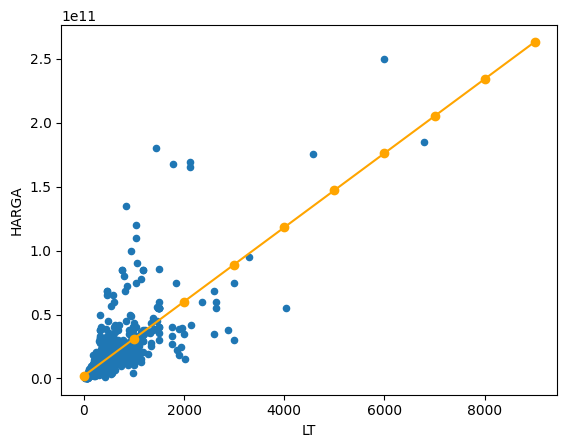

In [ ]:

df_rumah.plot(kind="scatter", x="LT", y="HARGA")
plt.scatter(x="Luas Tanah", y="Harga Rumah (prediksi)", data=df_prediksi_rumah, color="orange")
plt.plot(df_prediksi_rumah["Luas Tanah"], df_prediksi_rumah["Harga Rumah (prediksi)"], color="orange")
plt.show()

yang terlihat di plot diatas adalah:
- biru: data asli kita, dari dataset
- orange: data hasil prediksi, dari model Linear Regression

In [ ]:
# prediksi harga rumah saat luas tanah 0
model.predict([[0]])[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2092732951.0257645

In [ ]:
# prediksi harga rumah saat luas tanah 100
model.predict([[100]])[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


4992234549.983124

## Polynomial Regression
secara konsep, regression, tapi garisnya bisa belok2 alias bukan linear. linear itu lurus.

kalau dari sklearn, package yg kita gunakan, karena formula matematikanya mirip, dengan sedikit modifikasi, si sklearn tidak membuat model polynomial regression terpisah yang bisa kita import. yg dia buat adalah function untuk mengubah data input kita menjadi bentuk polynomial. jadi kita hanya perlu import LinearRegression + PolynomialFeatures.

In [ ]:
# 1. import data - data yang sama
df_rumah.head()

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
0,28000000000,1100,700,5,6,ADA,JAKSEL
1,19000000000,824,800,4,4,ADA,JAKSEL
2,4700000000,500,400,4,3,ADA,JAKSEL
3,4900000000,251,300,5,4,ADA,JAKSEL
4,28000000000,1340,575,4,5,ADA,JAKSEL


In [ ]:
# 2. rapiin data - kita gunakan yg sama juga
display(fitur.head(), target[:5])

,LT
0,1100
1,824
2,500
3,251
4,1340


0    28000000000
1    19000000000
2     4700000000
3     4900000000
4    28000000000
Name: HARGA, dtype: int64

In [ ]:
# tambahan untuk polynomial features
transformer = PolynomialFeatures(degree = 2, include_bias=False)
# fit transformer ke data fitur
fitur_poly = transformer.fit_transform(fitur)
display(pd.DataFrame(fitur_poly[:5]))

,0,1
0,1100.0,1210000.0
1,824.0,678976.0
2,500.0,250000.0
3,251.0,63001.0
4,1340.0,1795600.0


Polynomial Features membuat data input kita punya versi kuadratnya, veri polynomialnya

In [ ]:
# 3. latih model
model_poly = LinearRegression()
model_poly.fit(fitur_poly, target)

LinearRegression()

In [ ]:
# 4. evaluasi
model_poly.score(fitur_poly, target)

0.5489036716735274

score: 0.5528011339729806


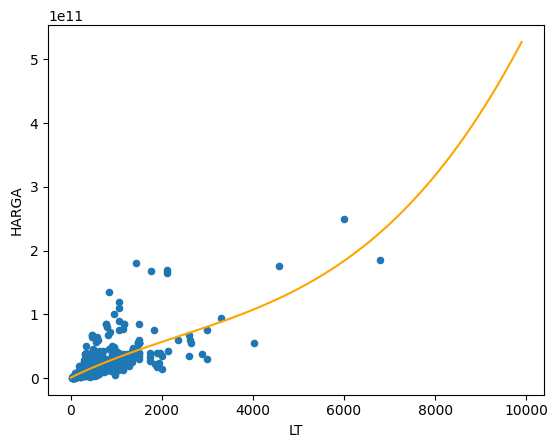

In [ ]:
# 5. tuning, kita bisa coba ubah degree Polynomialnya misalnya

# tambahan untuk polynomial features
transformer = PolynomialFeatures(degree = 3, include_bias=False)
fitur_poly = transformer.fit_transform(fitur)

# 3. latih model
model_poly = LinearRegression()
model_poly.fit(fitur_poly, target)

# 4. evaluasi
print("score:", model_poly.score(fitur_poly, target))

# optional: visualisasi
# buat dulu data hasil prediksi
x_luas = np.arange(0, 10000, 100).reshape((-1,1)) # dummy data input
x_luas_poly = transformer.fit_transform(x_luas) # diubah jadi versi polynomial
hasil_prediksi = model_poly.predict(x_luas_poly) # hasil prediksi menggunakan fitur polynomial, model juga model poly

df_prediksi_rumah = pd.DataFrame({"Luas Tanah": x_luas.reshape((100,)), "Harga Rumah (prediksi)": hasil_prediksi})

# plot data awal
df_rumah.plot(kind="scatter", x="LT", y="HARGA")

# plot data prediksi
# plt.scatter(x="Luas Tanah", y="Harga Rumah (prediksi)", data=df_prediksi_rumah, color="orange")
plt.plot(df_prediksi_rumah["Luas Tanah"], df_prediksi_rumah["Harga Rumah (prediksi)"], color="orange")

plt.show()

HARGA = a * LT + b * LT^2 + c * LT^3 + d

# Review

kita punya data harga rumah, dan kita punya data luas tanah.

kita mau buat prediksi, diberikan sebuah luas tanah, kira2 harga rumahnya berapa?

untuk prediksi ini, kita gunakan teknik Machine Learning, yang namanya "Linear Regression"

Linear Regression mencari pattern dari data kita. pattern ini akan ditulis dalam bentuk formula matematika `y = ax + b` atau `harga_rumah = a * luas_tanah + b` dimana a dan b adalah sebuah angka fix.

In [ ]:
# perhatikan dulu data kita
df_rumah.head(10)

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
0,28000000000,1100,700,5,6,ADA,JAKSEL
1,19000000000,824,800,4,4,ADA,JAKSEL
2,4700000000,500,400,4,3,ADA,JAKSEL
3,4900000000,251,300,5,4,ADA,JAKSEL
4,28000000000,1340,575,4,5,ADA,JAKSEL
5,10000000000,460,300,4,4,ADA,JAKSEL
6,7600000000,278,350,4,4,ADA,JAKSEL
7,5250000000,511,300,3,2,ADA,JAKSEL
8,670000000,70,69,3,2,TIDAK ADA,JAKSEL
9,480000000,66,42,2,1,TIDAK ADA,JAKSEL


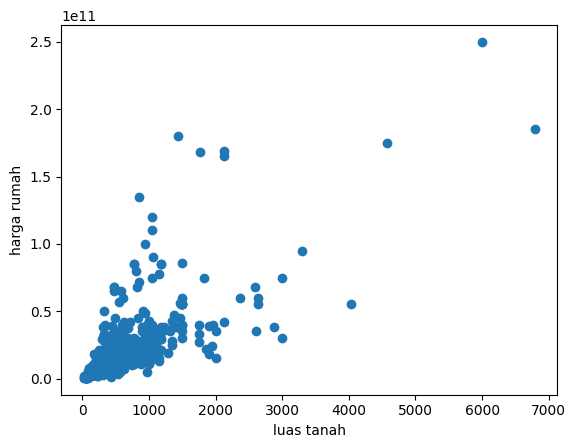

In [ ]:
# cari pattern
# kalau kita visualisasikan
plt.scatter(data=df_rumah, x="LT", y="HARGA")
plt.xlabel("luas tanah")
plt.ylabel("harga rumah")
plt.show()

kalau luas tanah 1000, harga rumahnya berapa?

kalau kita dapat konstan a dan b, kita bisa hitung `luas_tanah 1000 * a + b = harga_rumah`

yang lucunya formula linear regression ini kalau kita masukin ke plot, akan jadi garis lurus. makanya namanya linear.

In [ ]:
luas_tanah = df_rumah[["LT"]]
luas_tanah

# kita siapkan data fitur dalam bentuk 2 dimensi, sesuai ketentuan sklearn

,LT
0,1100
1,824
2,500
3,251
4,1340
...,...
996,488
997,209
998,692
999,102


In [ ]:
harga_rumah = df_rumah["HARGA"]
harga_rumah

0       28000000000
1       19000000000
2        4700000000
3        4900000000
4       28000000000
           ...     
996     16000000000
997      4500000000
998     29000000000
999      1700000000
1000     1250000000
Name: HARGA, Length: 1001, dtype: int64

In [ ]:
# kita gunakan Machine Learning untuk dapet formula ini
# kita pakai package sklearn

from sklearn.linear_model import LinearRegression

model_LR_luas_prediksi_harga = LinearRegression()
# sudah pilih algortima, kita latih dengan data
model_LR_luas_prediksi_harga.fit(luas_tanah, harga_rumah)

LinearRegression()

In [ ]:
# model yang sudah jadi, bisa kita gunakan
# bisa kita intip juga formula regression seperti apa
print(model_LR_luas_prediksi_harga.coef_, model_LR_luas_prediksi_harga.intercept_)

[28995015.98957359] 2092732951.0257645


harga_rumah = 28995015.98957359 * luas_tanah + 2092732951.0257645

In [ ]:
# kalau luas tanah 1000, harga rumahnya berapa?
l = 1000

h = 28995015.98957359 * l + 2092732951.0257645

print(h)

31087748940.599354


In [ ]:
model_LR_luas_prediksi_harga.predict([[1000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.10877489e+10])

In [ ]:
# evaluasi model
model.score(luas_tanah, harga_rumah)

0.5482919679015921

di contoh ini, kita menggunakan 1 fitur, luas tanah. kita bergantung pada fitur untuk menebak target harga rumah.

kita bisa saja meminta 2 fitur, luas tanah dan luas bangunan. formula linear regression akan bertambah menjadi `a * luas_tanah + b * luas_bangunan + c = harga_rumah`

fitur (dan target juga) harus dalam bentuk numerik

ini adalah keterbatasan komputer yang cuma bisa mengolah data tipe numerik.

bagaimana kalau datanya ada yang non-numerik, seperti kolom "GRS" ada/tidak ada garasi? kita akan gunakan teknik **encoding** dimana kita convert semua text jadi angka. misalnya "ada" --> 0, dan "tidak ada" --> 1.

data seperti kota juga kita encoding. misalkan ada 5 kota, maka kotaA --> 0, kotaB --> 1, ...

----
note: misalkan datanya banyak banget kategorinya, 213 kota berbeda, atau angka besar lainnya, kita akan ketemu masalah baru. ML model yang kita latih akan terlalu tidak akurat dalam menebak kota2 ini, misalkan kota adalah targetnya. ini namanya masalah "high cardinality" nanti kita bahas lagi di sesi 15.

nilai model.score dari model Linear dan Polynomial Regression, menunjukkan seberapa bagus fit dari hasil regresi dengan data yang dicoba.

note, nilai fit yang tinggi bukan berarti modelnya bagus, karena bisa saja terjadi over-fitting dimana model menghapal data yang ada dan bukan memprediksi trend dengan baik.

untuk mengurangi kemungkinan over-fitting, biasanya kita split dataset kita menjadi 2: 80% untuk data training, 20% untuk data testing.

jika nilai score fit untuk data training dan data testing hampir sama, maka kita bisa lebih yakin kalau model melihat trend bukan menghapal data.